# Git

In [1]:
! git clone https://github.com/WastingT-me/GPN-test.git
%cd /content/GPN-test

Cloning into 'GPN-test'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 59 (delta 20), reused 29 (delta 5), pack-reused 0
Receiving objects: 100% (59/59), 1.19 MiB | 9.13 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/GPN-test


# Чтение и анализ данных

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame(pd.read_excel("data/data.xlsx"))
print(df.shape)
df.head()

(407, 38)


,datatime,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
0,01.01.2019 07:00:00,851.3,13992.829540,280.748261,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,390.014061,34.641964,0.590507,1.334964,...,173.592126,1880.250775,64934.226796,1997.009659,46.058654,34.107018,4.122300,38.266313,369.910731,370.940167
1,02.01.2019 07:00:00,851.7,13214.682745,287.760227,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.976684,29.417244,3.039666,1.261034,...,173.474671,1900.988241,64887.815539,1990.852706,46.216459,34.941665,4.113665,39.091541,369.402941,371.119521
2,02.01.2019 07:00:00,851.7,13214.682745,287.760227,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.976684,29.417244,3.039666,1.261034,...,173.474671,1900.988241,64887.815539,1990.852706,46.216459,34.941665,4.113665,39.091541,369.402941,371.119521
3,03.01.2019 07:00:00,852.4,13031.126273,287.446907,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.960257,23.281082,2.986076,1.269644,...,173.516566,1894.297256,65080.555143,1981.679355,46.388590,34.852216,4.111253,38.996565,369.191242,371.213372
4,04.01.2019 07:00:00,852.8,13599.110247,276.926470,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation,389.995702,22.760785,3.119679,1.255986,...,173.526882,1913.514736,64998.802233,1997.338611,47.227642,35.533084,4.134403,39.680946,368.975814,371.347260


In [5]:
df['datatime']=pd.to_datetime(df['datatime'])
df['datatime']=df['datatime'].apply(lambda x: x.value)

Ищем не-числовые признаки

In [6]:
non_numerical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[non_numerical_cols].head()

,X3,X4
0,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
1,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
2,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
3,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation
4,[-11059] No Good Data For Calculation,[-11059] No Good Data For Calculation


Х3 и Х4 убираем за неимением "хороших данных"

In [7]:
df = df.drop(columns=non_numerical_cols)

In [8]:
df.isna().sum()

datatime     0
Y           60
X1           0
X2           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
X17          0
X18          0
X19          0
X20          0
X21          0
X22          0
X23          0
X24          0
X25          0
X26          0
X27          0
X28          0
X29          0
X30          0
X31          0
X32          0
X33          0
X34          0
X35          0
X36          0
dtype: int64

Пойдем по пути наименьшего сопротивления и просто уберем пропуски таргетов

In [9]:
df = df.dropna()

# Корреляционный анализ

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

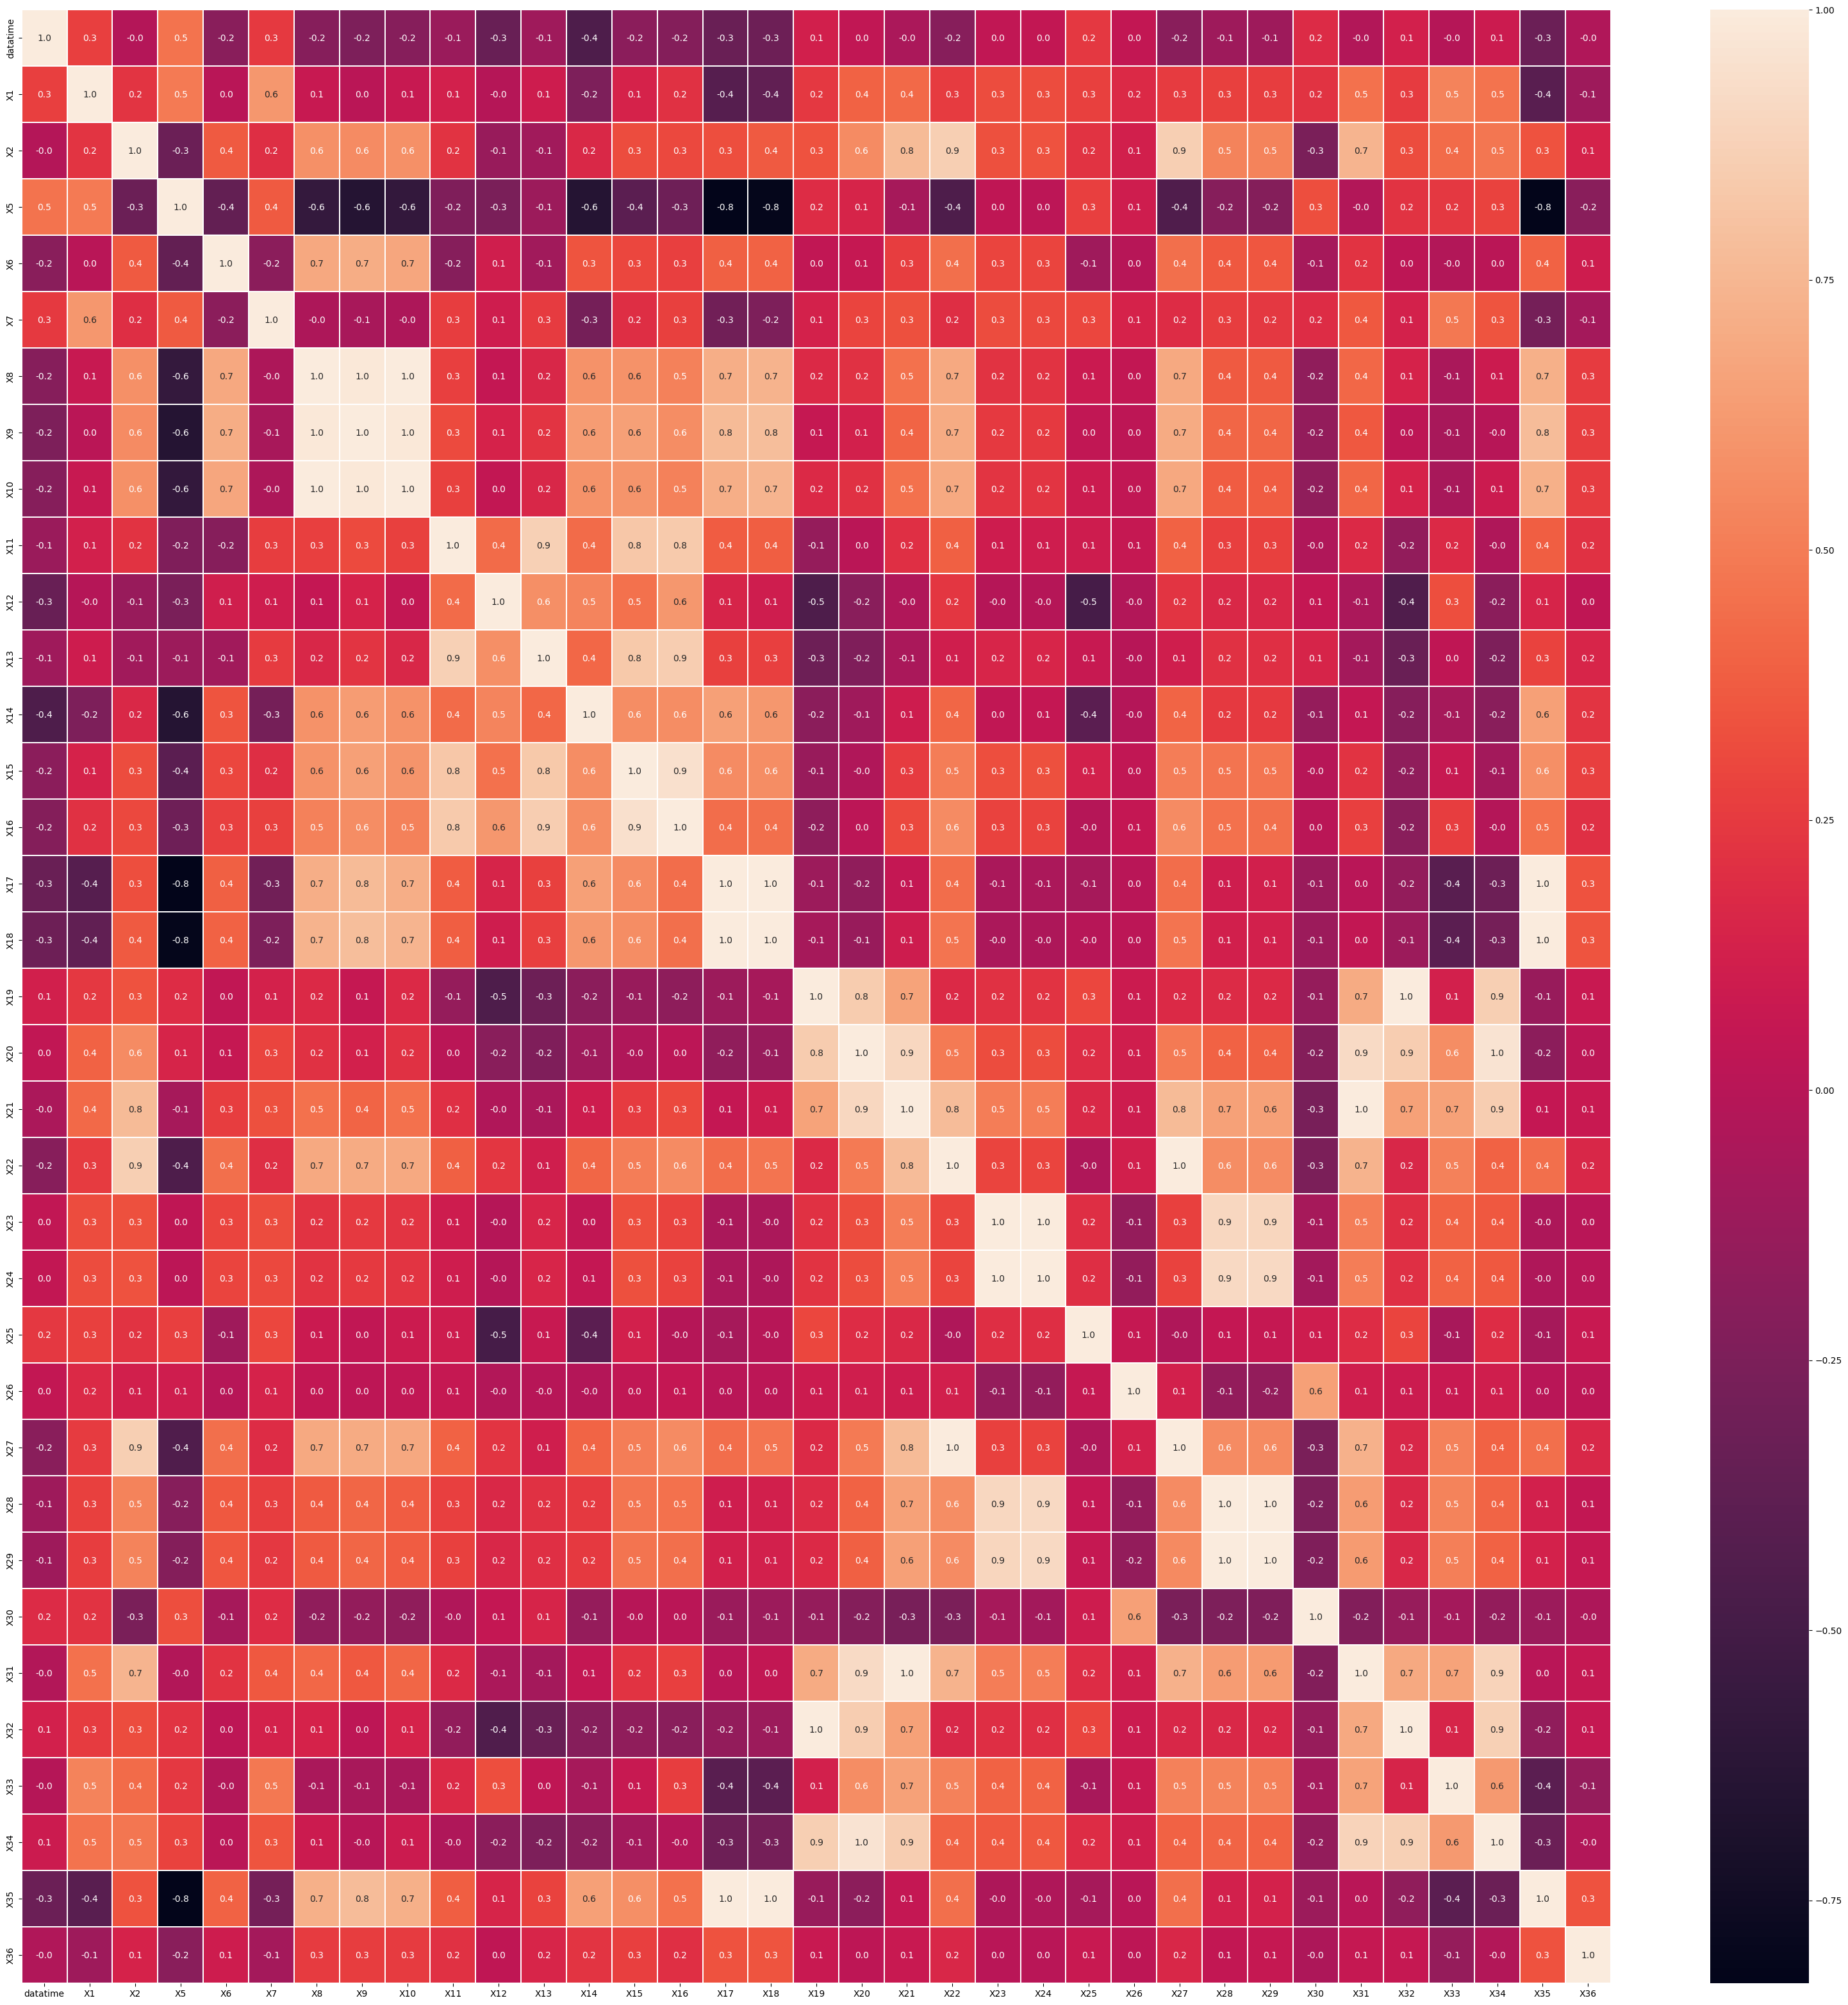

In [11]:
fig, ax = plt.subplots(figsize=(40,40))
_ = sns.heatmap(df.loc[:, ~df.columns.isin(['Y'])].corr(),annot= True,linewidths=0.1,fmt = ".1f", ax=ax)

In [12]:
corr_matrix = df.loc[:, ~df.columns.isin(['Y'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [13]:
df_corr = df.copy()
df_corr.drop(to_drop, axis=1, inplace=True)

In [14]:
df_corr.head()

,datatime,Y,X1,X2,X5,X6,X7,X8,X11,X12,...,X20,X21,X22,X23,X25,X26,X28,X30,X33,X36
0,1546326000000000000,851.3,13992.829540,280.748261,390.014061,34.641964,0.590507,1.334964,254.064804,115.996136,...,38.396885,46.083613,173.589934,1809.578281,0.0,1991.038192,1880.250775,1997.009659,4.122300,370.940167
1,1549004400000000000,851.7,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,...,39.030830,46.250694,173.485572,1826.127470,0.0,1997.014835,1900.988241,1990.852706,4.113665,371.119521
2,1549004400000000000,851.7,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,...,39.030830,46.250694,173.485572,1826.127470,0.0,1997.014835,1900.988241,1990.852706,4.113665,371.119521
3,1551423600000000000,852.4,13031.126273,287.446907,389.960257,23.281082,2.986076,1.269644,259.681162,116.990422,...,39.051247,46.427059,173.513604,1821.998828,0.0,2012.590367,1894.297256,1981.679355,4.111253,371.213372
4,1554102000000000000,852.8,13599.110247,276.926470,389.995702,22.760785,3.119679,1.255986,259.255635,116.944134,...,39.758041,47.260830,173.527839,1823.468686,0.0,2014.102222,1913.514736,1997.338611,4.134403,371.347260


## Визуализируем нашу целевую переменную

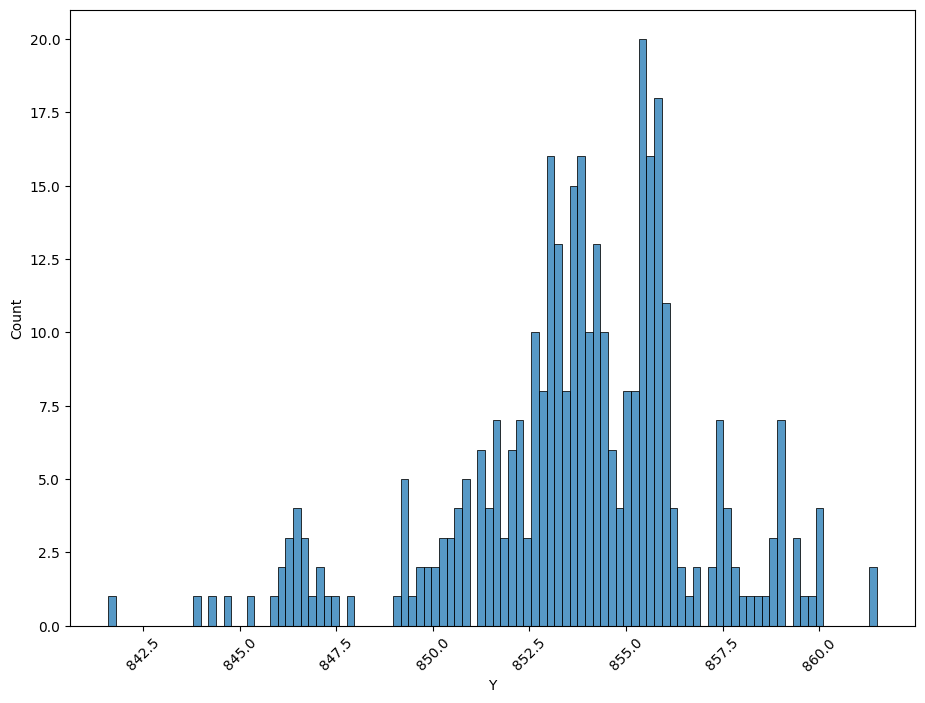

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.histplot(df["Y"], bins=100);

# Предобработка данных

Делим выборку на тренировочную/тестовую не нарушая порядок временного ряда

In [90]:
X_train = df_corr.iloc[:int(0.8*len(df))].drop("Y", axis=1)
X_test = df_corr.iloc[int(0.8*len(df)):].drop("Y", axis=1)
y_train = df_corr['Y'].iloc[:int(0.8*len(df))]
y_test = df_corr['Y'].iloc[int(0.8*len(df)):]

In [91]:
X_train

,datatime,X1,X2,X5,X6,X7,X8,X11,X12,X13,...,X20,X21,X22,X23,X25,X26,X28,X30,X33,X36
0,1546326000000000000,13992.829540,280.748261,390.014061,34.641964,0.590507,1.334964,254.064804,115.996136,289.254403,...,38.396885,46.083613,173.589934,1809.578281,0.000000,1991.038192,1880.250775,1997.009659,4.122300,370.940167
1,1549004400000000000,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,292.001201,...,39.030830,46.250694,173.485572,1826.127470,0.000000,1997.014835,1900.988241,1990.852706,4.113665,371.119521
2,1549004400000000000,13214.682745,287.760227,389.976684,29.417244,3.039666,1.261034,256.969473,117.097939,292.001201,...,39.030830,46.250694,173.485572,1826.127470,0.000000,1997.014835,1900.988241,1990.852706,4.113665,371.119521
3,1551423600000000000,13031.126273,287.446907,389.960257,23.281082,2.986076,1.269644,259.681162,116.990422,293.405546,...,39.051247,46.427059,173.513604,1821.998828,0.000000,2012.590367,1894.297256,1981.679355,4.111253,371.213372
4,1554102000000000000,13599.110247,276.926470,389.995702,22.760785,3.119679,1.255986,259.255635,116.944134,293.103780,...,39.758041,47.260830,173.527839,1823.468686,0.000000,2014.102222,1913.514736,1997.338611,4.134403,371.347260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1562655600000000000,18257.061799,318.724858,394.993298,25.323181,4.114500,1.161228,252.151831,98.041243,286.584979,...,41.253437,48.884284,169.542874,1907.399123,21.993151,2041.865012,1945.344388,2002.467099,4.587016,351.633035
297,1565334000000000000,15379.642370,321.857502,394.998329,21.302424,2.073781,1.076289,255.742460,99.750969,288.382082,...,41.506021,49.169964,170.500811,1962.734101,0.000000,2066.441292,1952.818147,2007.269164,4.579758,346.459049
298,1568012400000000000,15601.823455,322.924476,395.002276,21.302209,0.936869,1.073403,255.042380,99.004295,287.334070,...,41.574181,49.231850,170.434668,1947.105362,0.000000,2102.274444,1946.543377,1999.829995,4.581439,346.177841
300,1570604400000000000,15800.921542,321.895694,394.966587,37.477536,0.139966,1.162212,245.234925,99.514047,281.142113,...,41.528298,49.047031,169.925729,1938.603680,0.000000,2003.732165,1934.935942,1996.467737,4.581977,348.047033


## Feature Importances

Будем использовать линейную регресию с $L^2$-регуляризацией и перестановки

Плюсом нормализация числовых признаков

In [92]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

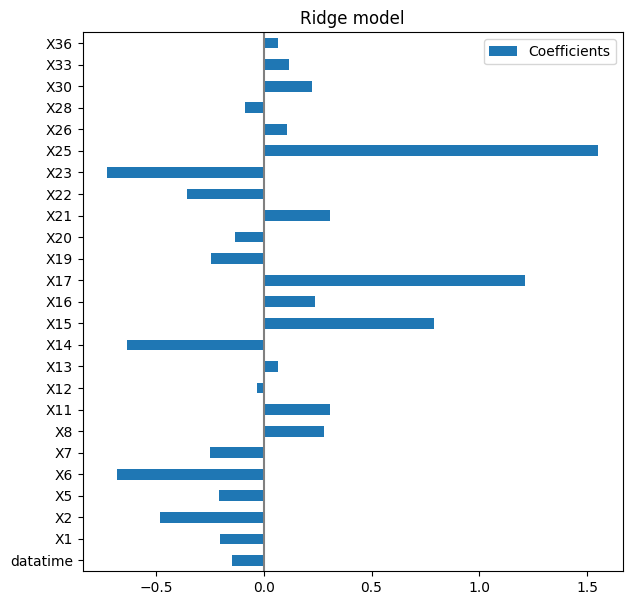

In [93]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=df_corr.drop("Y", axis=1).columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Также посмотрим на разброс коэффициентов

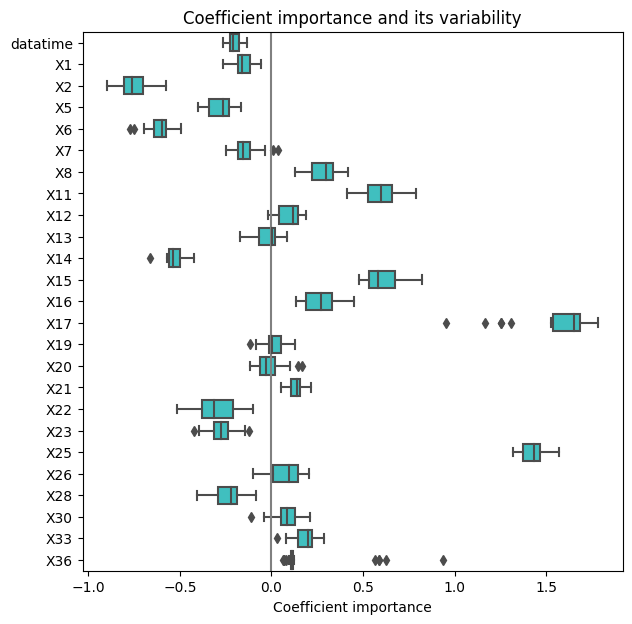

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    df_corr.drop("Y", axis=1),
    df_corr['Y'],
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [model[1].coef_ for model in cv_model["estimator"]],
    columns=df_corr.drop("Y", axis=1).columns,
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

Стоит заметить, что для прогнозирования кросс-валидация не так информативна за счет перемешивания временных отрезков, однако такое используется в задаче Change Point Detection, и , например, в данном случае неплохо показывает высокую дисперсию у фич 19/20

Перестановки:

In [95]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

feature_importances = pd.Series(result.importances_mean, index=df_corr.drop("Y", axis=1).columns)

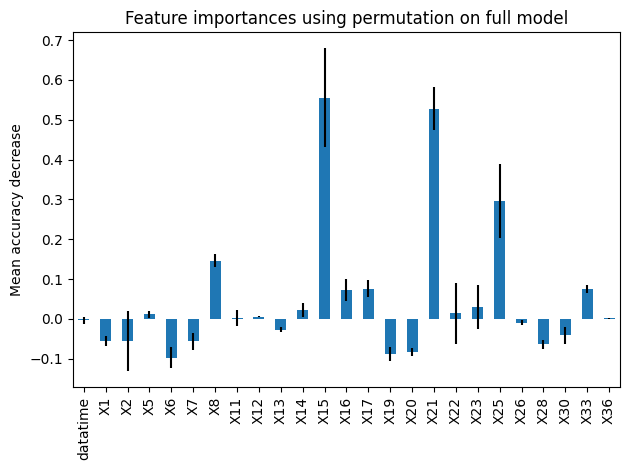

In [96]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Можно смело исключать фичи `datatime`, `X5`, `X11`, `X12`, `X13`, `X14`,`X26`, `X30`, и `X36`. Оставим фичи `X22` и `X23` из-за высокого разброса.

In [97]:
drop_cols = ['datatime', 'X5', 'X11', 'X12', 'X13', 'X14','X26', 'X30', 'X36']
X_train, X_test = X_train.drop(drop_cols, axis=1), X_test.drop(drop_cols, axis=1)

# Линейная регрессия

In [98]:
X_train = X_train[X_train.columns]
X_test = X_test[X_test.columns]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Инициализация модели

In [99]:
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LinearRegression

Для оценки качества модели будем использовать $R^2$-метрику

In [100]:
from sklearn.metrics import r2_score

## Подбор гиперпараметров





In [101]:
from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="r2", cv=10):
  searcher = GridSearchCV(
      model,
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_
  return best_params

In [102]:
best_params_lr = gridsearch(
    X_train, y_train,
    LinearRegression(),
    {
        "fit_intercept": [True, False],
        "positive": [True, False],
    }
)

In [103]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  print("R2 = {}".format(round(r2, 3)))

  return model, pred, r2

In [104]:
linreg, pred_lr, r2_lr = model_train_test(
    X_train,
    y_train,
    X_test,
    y_test,
    LinearRegression(**best_params_lr)
)

R2 = 0.573


## Модели с $L_1-$ и $L_2-$ регуляризацией


In [105]:
from sklearn.linear_model import Ridge, Lasso

In [106]:
best_params_ridge = gridsearch(
    X_train, y_train,
    Ridge(),
    {
        "alpha": np.logspace(-2, 3, 21),
        "tol": np.logspace(-5, 0, 21),
    }
)

ridge, pred_ridge, r2_ridge = model_train_test(
    X_train,
    y_train,
    X_test,
    y_test,
    Ridge(**best_params_ridge)
)

R2 = 0.599


In [107]:
best_params_lasso = gridsearch(
    X_train, y_train,
    Lasso(),
    {
        "alpha": np.logspace(-2, 3, 21),
        "tol": np.logspace(-5, 0, 21),

    }
)

lasso, pred_lasso, r2_lasso = model_train_test(
    X_train,
    y_train,
    X_test,
    y_test,
    Lasso(**best_params_lasso)
)

R2 = 0.647


## Результаты

In [108]:
ans_df = pd.DataFrame()
ans_df["Model"] = ["Linear Regression", "Ridge", "Lasso"]
ans_df["R2"] = [r2_lr, r2_ridge, r2_lasso]
ans_df.sort_values(by=["R2"], ascending=False)

,Model,R2
2,Lasso,0.647099
1,Ridge,0.598671
0,Linear Regression,0.573161


Сохраняем модели

In [109]:
import pickle

In [110]:
models = [linreg, ridge, lasso]
for model in models:
    pickle.dump(model, open('{}.sav'.format(model), 'wb'))